In [1]:
# importing all necessary Libraries

import matplotlib.pyplot as plt
# Image related operations
import matplotlib.image as mpimg 
import numpy as np
import cv2 # opencv lib

In [2]:
# Loading the image of the car
img_path="/content/car1.jpeg"

In [3]:
# Matplotlib library has function mpimg to reach the image

car1 = mpimg.imread(img_path)

In [4]:
# Car has the shape of 168*300 pixels and since it is an RGB image hence 3 channels
# 168 * 300 * 3

car1.shape

(168, 300, 3)

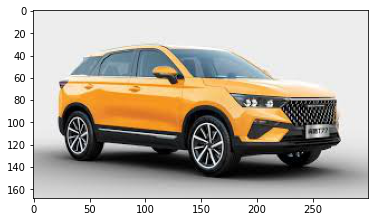

In [5]:
# Showing the car which was read by matplotlibxa
plt.imshow(car1)

In [6]:
# Library CV2 has function imread to read the image
car1_cv2 = cv2.imread(img_path)

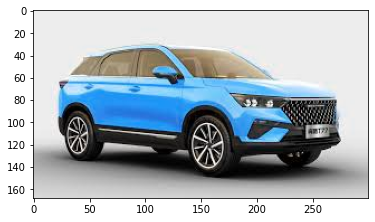

In [7]:
# cv2 reads images as BGR and in matplotlib reads as RGB
plt.imshow(car1_cv2) # 

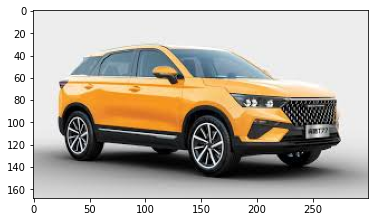

In [8]:
# Converting car from RGB to BGR

car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

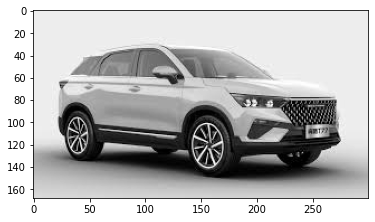

In [9]:
# Converting car from RGB to Grayscale

car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

Understanding composition of colored images

In [10]:

# Creating a function which dissect an existing RGB image into 3 separate images of color RED, GREEN and BLUE

def viusalize_RGB_channel(imgArray=None, figsize=(10,7)):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)
  print(f"B: {B}")
  print(f"G: {G}")
  print(f"R: {R}")

  # create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype) # can use any channel

  # init subplots
  fig, ax = plt.subplots(2,2, figsize=figsize)

  # plotting the actual image and RGB images
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  # ax[0,0].set_axis_off()
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Ch Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))

B: [[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [216 216 216 ... 211 211 211]
 [217 217 217 ... 213 213 213]
 [217 217 217 ... 214 214 214]]
G: [[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [216 216 216 ... 211 211 211]
 [217 217 217 ... 213 213 213]
 [217 217 217 ... 214 214 214]]
R: [[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [216 216 216 ... 211 211 211]
 [217 217 217 ... 213 213 213]
 [217 217 217 ... 214 214 214]]


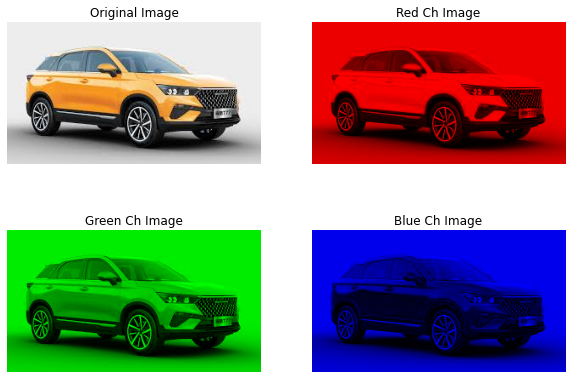

In [11]:
# calling function by passing car1_cv2 as parameter

viusalize_RGB_channel(imgArray=car1_cv2)

In [12]:
# we can create random color array image

random_colored_img = np.random.randint(0, 255, (6,6,3))
random_colored_img

array([[[117,  65, 190],
        [192,  54, 179],
        [175, 229,  71],
        [129, 150, 143],
        [  7, 210,  41],
        [  8, 132, 242]],

       [[236, 226,  53],
        [ 27, 250, 144],
        [209, 211, 116],
        [157,  52,  26],
        [ 15,  27,  37],
        [236,  82, 120]],

       [[122, 240,  14],
        [208,  15,  31],
        [ 97, 185, 113],
        [223,  46,  95],
        [241,  30, 252],
        [ 67, 103, 201]],

       [[ 89, 163,   8],
        [ 89,  26,  44],
        [243,   4, 227],
        [ 40, 173, 108],
        [201,  64,  59],
        [153, 163, 163]],

       [[115, 186, 107],
        [  4,  79, 200],
        [ 56,  20, 122],
        [ 96, 205, 172],
        [ 92,  44, 207],
        [100, 239,  10]],

       [[103,  13, 189],
        [239, 161, 223],
        [237, 152, 142],
        [181, 157, 201],
        [149, 179, 253],
        [164,  37, 234]]])

B: [[117 192 175 129   7   8]
 [236  27 209 157  15 236]
 [122 208  97 223 241  67]
 [ 89  89 243  40 201 153]
 [115   4  56  96  92 100]
 [103 239 237 181 149 164]]
G: [[ 65  54 229 150 210 132]
 [226 250 211  52  27  82]
 [240  15 185  46  30 103]
 [163  26   4 173  64 163]
 [186  79  20 205  44 239]
 [ 13 161 152 157 179  37]]
R: [[190 179  71 143  41 242]
 [ 53 144 116  26  37 120]
 [ 14  31 113  95 252 201]
 [  8  44 227 108  59 163]
 [107 200 122 172 207  10]
 [189 223 142 201 253 234]]


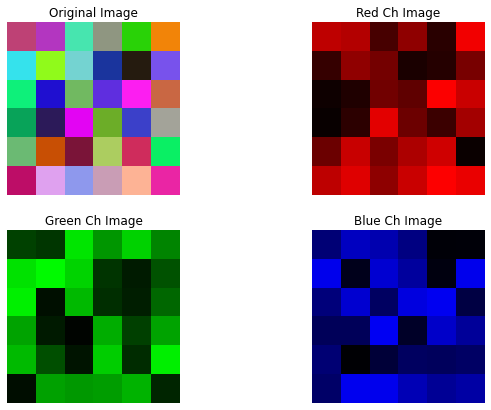

In [13]:
# call RGB_channel function with random_colore_image 
viusalize_RGB_channel(imgArray=random_colored_img)

Understanding filters

In [14]:
# creating SOBEL filter 

sobel = np.array([[ 1, 0,-1],
                  [ 2, 0,-2],
                  [ 1, 0,-1]])

In [15]:
print("highlighting Vertical edges:\n", sobel)

highlighting Vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [16]:
print("highlighting Horizontal edges:\n", sobel.T)

highlighting Horizontal edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


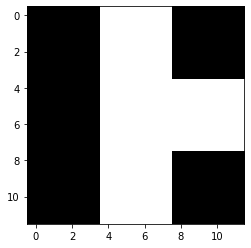

In [17]:

example = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]
example1 = np.array(example)
plt.imshow(example1, cmap="gray")

In [18]:
def simple_conv(imgFilter=None, picture=None):
  
  # extract the shape of the image
  p_row, p_col = picture.shape

  # shape of the filter is k =3
  k = imgFilter.shape[0] 

  temp = list()

#stride is taken as 1
  stride = 1

  # resulant image size
  final_cols = (p_col - k)//stride + 1
  final_rows = (p_row - k)//stride + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):

    # take horizontal right stride across col by col
    for h_stride in range(final_cols):

      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter * target_area_of_pic))
      temp.append(z)
  
  resulant_image = np.array(temp).reshape(final_rows, final_cols)
  
  return resulant_image

In [19]:
result = simple_conv(imgFilter=sobel, picture=example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])